In [19]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

In [20]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력

In [21]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [22]:
# 정규화
import re

In [23]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-26'

In [24]:
df = pd.read_csv(f'news_{today}.csv')
df.head(2)

,언론사,제목,내용,작성일시
0,매일경제,토스증권 커뮤니티서 가장 많은 관심 받은 종목은 ‘엔비디아’…2·3위는?,"\n 사진 확대 토스증권 2024년 커뮤니티 결산 이미지. [사진 출처 = 토스증권] 토스증권 커뮤니티는 올해 결산 발표를 통해 12월 기준 월간 활성 이용자 수(MAU) 180만명을 돌파하며 연초 대비 150% 성장했다고 26일 밝혔다. 일간 활성 이용자 수(DAU)는 75만명으로 연초 1월 대비 2배 가까이 증가했다.일 팔로우 수는 4만개로 연초 4000개에 비해 10배로 늘었으며 총 팔로우 수는 380만 개에 달한다. 일 생성 게시글 수도 20만개로 연초 대비 4배 증가했다.사용자들의 활발한 활동도 주목할 만하다. 1인당 평균 일별 커뮤니티 방문 횟수는 30회 이상, 월별 방문 횟수는 200회를 넘어섰다. 이는 토스증권 커뮤니티가 투자자들에게 이미 일상적인 정보 교류의 장으로 자리매김했다고 해석 가능하다.이 기간 토스증권 커뮤니티에서 가장 많은 관심을 받은 종목은 엔비디아였다. 뒤를 이어 테슬라와 트럼프 미디어&테크놀로지가 각각 2위와 3위를 차지하며 전 세계적으로 주목받은 이슈와 연관된 기업들이 커뮤니티에서 논의를 주도했다.토스증권 커뮤니티는 사용자 간 활발한 정보 교류와 토론이 이뤄지며 균형 있는 성별, 다양한 연령층의 투자자들이 참여하고 있다. 성별은 남성 60%, 여성 40%로 남성 유저 숫자가 비교적 많았으며 연령은 20대 31.2%, 30대 23.4%, 40대 23.4% 순이었다.특히 20대가 가장 큰 비중을 차지하며 젊은 세대의 높은 투자 관심이 반영됐다.토스증권 커뮤니티는 투자자 보호와 건전한 토론 문화 조성을 위해 나쁜 글 탐지 로직 등 다각도의 안전장치를 도입하기도 했다. 유저가 게시글을 업로드 하는 시점에 알고리즘을 통한 분류 작업이 진행되며 상담 전문 계열사인 토스CX에서 전담 인력이 커뮤니티를 모니터링한다.토스증권 관계자는 “지난 2021년 6월에 출시한 커뮤니티 서비스가 3년 만에 크게 성장하며 개인 투자자들이 서로 배우고 소통할 수 있는 공간으로 운영되고 있다”며 “앞으로도 투자자들에게 꼭 필요한 정보를 제공하며 국내 대표 투자 커뮤니티로서의 입지를 강화할 계획이다”라고 말했다.\n",2024-12-26 14:00:29
1,매일경제,같은 조선株여도 갈린 초고수의 선택…삼성重은 매수·현대重은 매도 [주식 초고수는 지금],"\n주식 투사 수익률 상위 1% 초고수들은 26일 오전 9시 30분 기준 HD현대일렉트릭, LG화학, NAVER, 삼성중공업, POSCO홀딩스 등을 가장 많이 순매수한 것으로 나타났다.반대로 가장 많이 순매도한 종목은 에스오에스랩, HD현대중공업, 루닛, 파인메딕스, 알테오젠 순이었다. 사진 확대 26일 미래에셋증권에 따르면 미래에셋증권에서 주식을 거래하는 수익률 상위 1% 투자자들은 이날 개장 뒤 오전 9시 30분까지 HD현대일렉트릭을 가장 많이 사들인 것으로 집계됐다.오전 9시 30분 기준 HD현대일렉트릭은 전 거래일 대비 0.64% 떨어진 38만7000원에 거래되고 있다.HD현대일렉트릭은 2017년 현대중공업으로부터 인적분할 후 전기전자기기와 에너지솔루션 전문기업으로 독립 출범해변압기, 차단기 등 전력기기와 배전기기 등 사업을 영위하고 있다.\n",2024-12-26 13:52:54


In [25]:
df.shape

(100, 4)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [27]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,91
top,매일경제,토스증권 커뮤니티서 가장 많은 관심 받은 종목은 ‘엔비디아’…2·3위는?,"\n 사진 확대 토스증권 2024년 커뮤니티 결산 이미지. [사진 출처 = 토스증권] 토스증권 커뮤니티는 올해 결산 발표를 통해 12월 기준 월간 활성 이용자 수(MAU) 180만명을 돌파하며 연초 대비 150% 성장했다고 26일 밝혔다. 일간 활성 이용자 수(DAU)는 75만명으로 연초 1월 대비 2배 가까이 증가했다.일 팔로우 수는 4만개로 연초 4000개에 비해 10배로 늘었으며 총 팔로우 수는 380만 개에 달한다. 일 생성 게시글 수도 20만개로 연초 대비 4배 증가했다.사용자들의 활발한 활동도 주목할 만하다. 1인당 평균 일별 커뮤니티 방문 횟수는 30회 이상, 월별 방문 횟수는 200회를 넘어섰다. 이는 토스증권 커뮤니티가 투자자들에게 이미 일상적인 정보 교류의 장으로 자리매김했다고 해석 가능하다.이 기간 토스증권 커뮤니티에서 가장 많은 관심을 받은 종목은 엔비디아였다. 뒤를 이어 테슬라와 트럼프 미디어&테크놀로지가 각각 2위와 3위를 차지하며 전 세계적으로 주목받은 이슈와 연관된 기업들이 커뮤니티에서 논의를 주도했다.토스증권 커뮤니티는 사용자 간 활발한 정보 교류와 토론이 이뤄지며 균형 있는 성별, 다양한 연령층의 투자자들이 참여하고 있다. 성별은 남성 60%, 여성 40%로 남성 유저 숫자가 비교적 많았으며 연령은 20대 31.2%, 30대 23.4%, 40대 23.4% 순이었다.특히 20대가 가장 큰 비중을 차지하며 젊은 세대의 높은 투자 관심이 반영됐다.토스증권 커뮤니티는 투자자 보호와 건전한 토론 문화 조성을 위해 나쁜 글 탐지 로직 등 다각도의 안전장치를 도입하기도 했다. 유저가 게시글을 업로드 하는 시점에 알고리즘을 통한 분류 작업이 진행되며 상담 전문 계열사인 토스CX에서 전담 인력이 커뮤니티를 모니터링한다.토스증권 관계자는 “지난 2021년 6월에 출시한 커뮤니티 서비스가 3년 만에 크게 성장하며 개인 투자자들이 서로 배우고 소통할 수 있는 공간으로 운영되고 있다”며 “앞으로도 투자자들에게 꼭 필요한 정보를 제공하며 국내 대표 투자 커뮤니티로서의 입지를 강화할 계획이다”라고 말했다.\n",2024.12.25 17:52
freq,50,1,1,3


In [28]:
# 중복행만선택
df[df.duplicated()]

,언론사,제목,내용,작성일시


#### 텍스트 길이 분석

In [29]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [30]:
# 제목,내용 토큰 개수
df['제목_토큰_개수']=df['제목'].str.split().str.len()
df['내용_토큰_개수']=df['내용'].str.split().str.len()

In [31]:
df[['제목_길이','제목_토큰_개수','내용_길이','내용_토큰_개수']].describe()

,제목_길이,제목_토큰_개수,내용_길이,내용_토큰_개수
count,100.0000,100.000000,100.000000,100.00000
mean,33.9300,7.490000,1266.750000,255.21000
std,9.6685,2.276339,759.913743,161.10247
min,13.0000,3.000000,286.000000,45.00000
25%,27.0000,6.000000,760.500000,139.75000
50%,33.0000,7.000000,1013.500000,194.00000
75%,40.0000,9.000000,1675.500000,345.00000
max,63.0000,15.000000,5037.000000,1005.00000


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_개수'}>,
        <Axes: title={'center': '내용_토큰_개수'}>]], dtype=object)

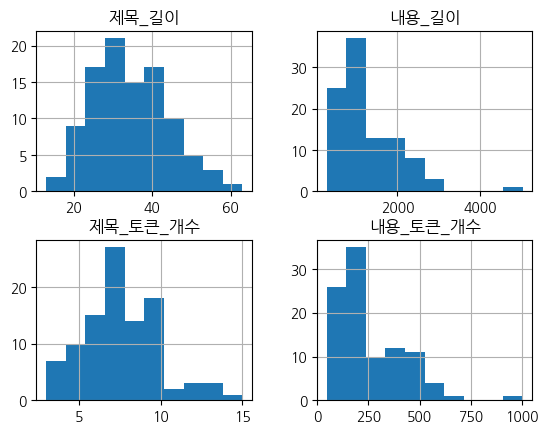

In [32]:
df.hist(bins=10)

In [33]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수
5,매일경제,"[MK시그널] 한화엔진, 선박 엔진 공급 계약 소식에 주가 상승세... MK시그널 추천 후 상승률 8.29% 기록","\n 사진 확대 12월 26일 한화엔진(082740)이 강세다. 전일 한화엔진 주가는 종가 기준 1.84% 하락한 17,640원에 마감했다. 현재는 18,890원으로 (10시 8분 기준) 전일 종가 대비 7.03% 상승한 상태를 보이고 있다.MK시그널은 한화엔진을 AI 2호를 통해 24년 12월 24일 매수 추천했으며, 목표가 및 손절가 도달 전 보유 전략을 통해 8.16%의 평가손익 수익률을 기록하고 있다.(MK시그널의 투자전략에 따른 수익 성과는 투자자별로 상이할 수 있습니다.)인공지능이 선정한 포트폴리오 AI 2호는 컨센서스가 상향된 든든한 실적 우량주로 포트폴리오 구성이 되어 있으며, 펀더멘탈, 수급 등 우량한 종목 대상 투자전략 시그널을 제공하고 있다. 포트폴리오 편입 후 최대 보유 기간은 10일, 목표가 20%, 손절가 10% 원칙으로 편출 전략을 가져가고 있다.한화엔진(082740)은 24일 한화오션과 841억원 규모의 선박용 엔진 공급계약을 체결했다는 소식에 주가가 상승하는 것으로 보인다. 계약 금액은 최근 매출액 대비 8.9%이며, 계약 기간은 지난 24일부터 오는 2027년 10월 25일까지다.MK시그널 현재 ‘첫 달 무료 이벤트’ 진행중!국내 주식과 더불어 미국 주식까지 한 번에! 빅데이터 알고리즘 AI의 추천 종목 매매 신호 받아보세요!인공지능(AI) 기반 매매신호 제공 앱 MK시그널이 뜨거운 성원에 힘입어, 12월 31일까지 고객 감사 할인 이벤트를 진행합니다! 회원가입 시 첫 달 무료 혜택과 함께 평생 최대 50% 할인을 제공합니다. 구글 플레이스토어와 애플 앱스토어에서 앱을 다운로드하고 회원가입 한 모든 회원이 참여할 수 있습니다. 이번 기회를 놓치지 말고 MK시그널과 함께 스마트하고 성공적인 투자를 시작하세요!▶MK시그널 한 달 무료체험하기 (클릭)◀▶MK시그널 iOS 버전 바로 다운받기 (클릭)◀▶MK시그널 안드로이드 버전 다운받기 (클릭)◀HOT 종목 : 쏠리드 한화오션 신성델타테크 엑스게이트 한화시스템 HD현대중공업 하이젠알앤엠\n",2024-12-26 13:46:27,63,1010,15,216


#### 워드클라우드 시각화
- https://github.com/amueller/word_cloud

In [34]:
# 제목을 하나의 문자열로 만들기
news_title = ' '.join(df['제목'])
news_title[:100]

'토스증권 커뮤니티서 가장 많은 관심 받은 종목은 ‘엔비디아’…2·3위는? 같은 조선株여도 갈린 초고수의 선택…삼성重은 매수·현대重은 매도 [주식 초고수는 지금] “美 대선 등 대내'

In [35]:
WordCloud?

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [36]:
def display_word_cloud(str, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

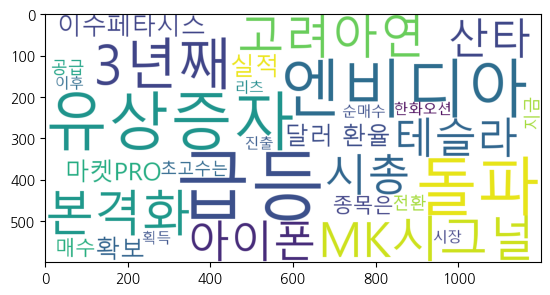

In [37]:
display_word_cloud(news_title)

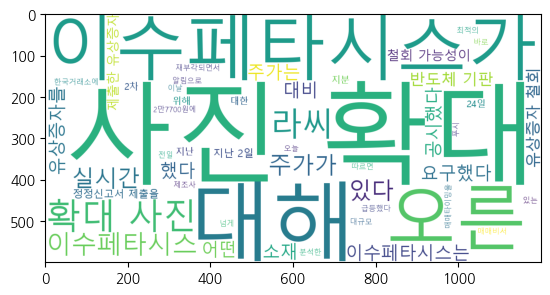

In [38]:
tmp_str = ''.join(df[df['제목'].str.contains('이수페타시스')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [39]:
tmp_word_cloud.words_

{'사진 확대': 1.0,
 '대해': 0.8571428571428571,
 '이수페타시스가': 0.8571428571428571,
 '오른': 0.8571428571428571,
 '확대 사진': 0.8571428571428571,
 '라씨': 0.7142857142857143,
 '이수페타시스': 0.7142857142857143,
 '있다': 0.5714285714285714,
 '실시간': 0.5714285714285714,
 '주가가': 0.5714285714285714,
 '이수페타시스는': 0.5714285714285714,
 '대비': 0.5714285714285714,
 '주가는': 0.5714285714285714,
 '했다': 0.5714285714285714,
 '공시했다': 0.5714285714285714,
 '어떤': 0.5714285714285714,
 '요구했다': 0.5714285714285714,
 '소재': 0.5714285714285714,
 '유상증자를': 0.5714285714285714,
 '반도체 기판': 0.5714285714285714,
 '유상증자 철회': 0.5714285714285714,
 '철회 가능성이': 0.5714285714285714,
 '제출한 유상증자': 0.5714285714285714,
 '정정신고서 제출을': 0.5714285714285714,
 '지난 2일': 0.5714285714285714,
 '24일': 0.42857142857142855,
 '지난': 0.42857142857142855,
 '2차': 0.42857142857142855,
 '위해': 0.42857142857142855,
 '지분': 0.42857142857142855,
 '대한': 0.42857142857142855,
 '최적의': 0.2857142857142857,
 '매매타이밍을': 0.2857142857142857,
 '있는': 0.2857142857142857,
 '오늘': 0.2857142857142857

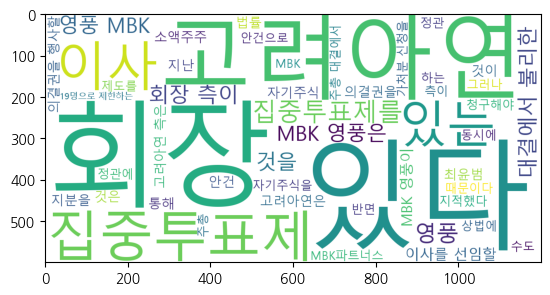

In [40]:
tmp_str = ''.join(df[df['제목'].str.contains('고려아연')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

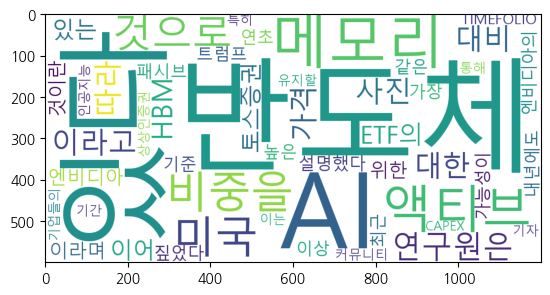

In [41]:
tmp_str = ''.join(df[df['제목'].str.contains('엔비디아')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

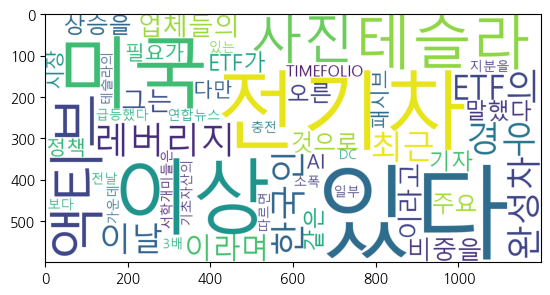

In [42]:
tmp_str = ''.join(df[df['제목'].str.contains('테슬라')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

#### 형태소 분석기로 특정 품사만 추출하기

In [43]:
# !pip install pecab

In [44]:
from pecab import PeCab
pecab = PeCab()


In [45]:
pecab.nouns('아버지가 방에 들어가신다 주말 여행 영남권')

['아버지', '방', '주말', '여행', '영남']

In [46]:
# 몇사 추출 하기
from tqdm import tqdm
tqdm.pandas()

In [47]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:02<00:00, 42.84it/s]


In [48]:
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치
1. 최신 버전의 JAVA(JDK)를 설치
2. JAVA_HOME 환경변수를 추가
3. path 환경변수에 %JAVA_HOME%\bin; 추가

### konlpy 설치   
- pip install --upgrade pip
- pip install JPype1
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install/

In [49]:
from konlpy.tag import Okt
okt = Okt()

In [50]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [51]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [52]:
okt.nouns(txt)

['아버지', '방']

In [53]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


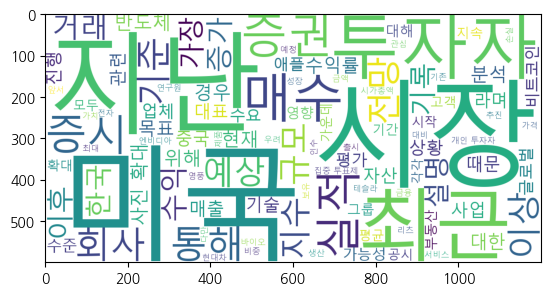

In [56]:
str = ''.join(df['내용_명사'])
dwc = display_word_cloud(str,100)

In [ ]:
dir(okt)

In [60]:
okt.tagset['Noun']

'명사'

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cvect = CountVectorizer()

In [76]:
X = cvect.fit_transform(df['내용_명사'])

In [77]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())
tmp.shape

(100, 3381)

In [78]:
df.columns

Index(['언론사', '제목', '내용', '작성일시', '제목_길이', '내용_길이', '제목_토큰_개수', '내용_토큰_개수',
       '제목_명사', '내용_명사'],
      dtype='object')

In [79]:
tmp.sum().sort_values(ascending=False)

투자      219
주가      201
기업      186
시장      153
미국      148
       ... 
스튜어드      1
스토어       1
스토리       1
스테이크      1
힐로        1
Length: 3381, dtype: int64